In [1]:
import numpy as np
import copy as cp
import matplotlib as mt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import matplotlib.pyplot as plt
import pyemma.plots as mplt 
import pyemma
import pickle as pkl
import sklearn as skl
import sklearn.metrics as mtr
import scipy as sc
import sys
from tqdm import tqdm

In [2]:
vall = np.load('direct/saved_vamp/vamps_all.npy')

In [3]:
vall.shape

(229, 10, 3, 2)

In [4]:
fsupervised = [np.load(f'../2_additional_s229_mopR/cog/saved_supervised/fimp_supervised_{i}.npy')
              for i in range(5)]
fsupervised = np.nanmean(fsupervised, axis=0), np.nanstd(fsupervised, axis=0)

furf2 = [np.load(f'../2_additional_s229_mopR/cog/saved_furf/fimp_hlabel2_{i}.npy')
        for i in range(5)]
furf2 = np.nanmean(furf2, axis=0), np.nanstd(furf2, axis=0)

furf3 = [np.load(f'../2_additional_s229_mopR/cog/saved_furf/fimp_hlabel3_{i}.npy')
        for i in range(5)]
furf3 = np.nanmean(furf3, axis=0), np.nanstd(furf3, axis=0)

In [5]:
fsupervised[0].shape

(229,)

In [6]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_1811490/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


In [7]:
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=7
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=7
plt.rcParams['ytick.major.width']=2

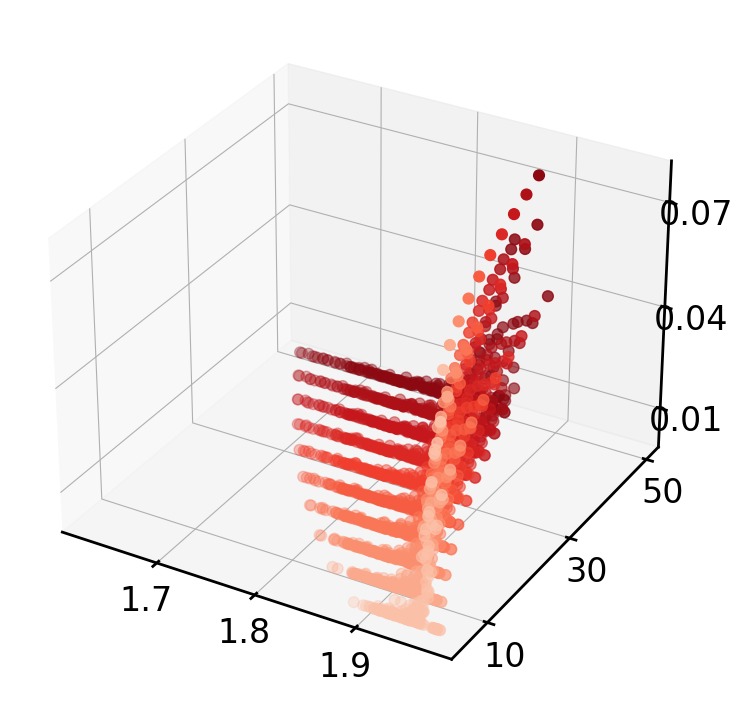

In [10]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i,1,0], [5*(i+1) for j in range(229)], furf2[0], 
                               color=cmaps((i+3)/13), s=60)
ax0.set_zlim(0,0.08)
ax0.tick_params(labelsize=24)
ax0.set_xticks([1.7,1.8,1.9])
ax0.set_yticks([10,30,50])
ax0.set_zticks([0.01,0.04,0.07])
plt.savefig('plots/vamp2_urf2.pdf')
plt.show()

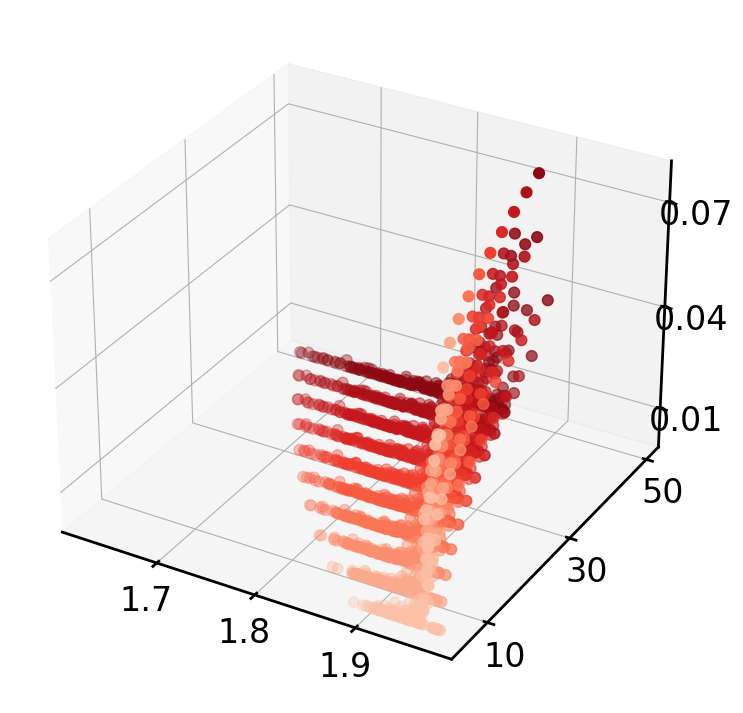

In [11]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i,1,0], [5*(i+1) for j in range(229)], furf3[0], 
                               color=cmaps((i+3)/13), s=60)
ax0.set_zlim(0,0.08)
ax0.tick_params(labelsize=24)
ax0.set_xticks([1.7,1.8,1.9])
ax0.set_yticks([10,30,50])
ax0.set_zticks([0.01,0.04,0.07])
plt.savefig('plots/vamp2_urf3.pdf')
plt.show()

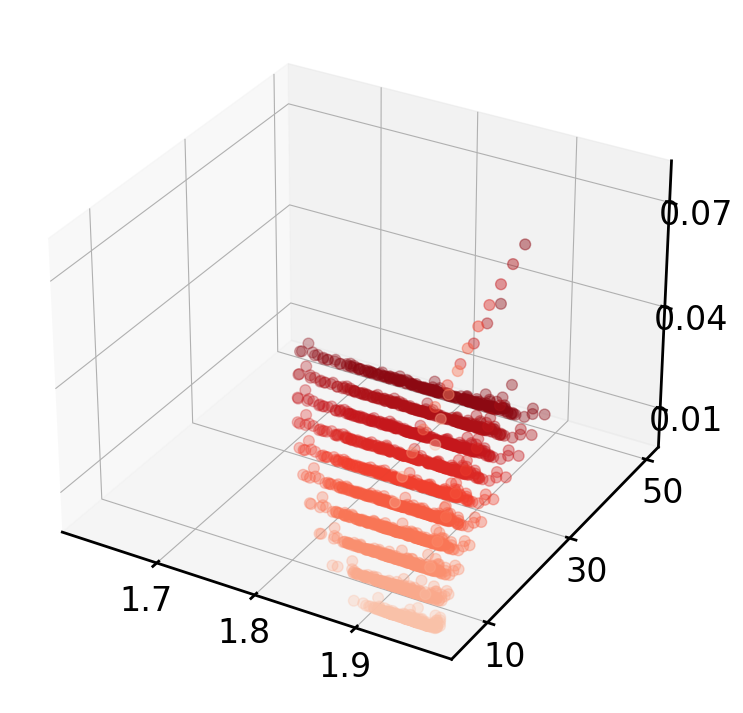

In [12]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for i in range(10):ax0.scatter(vall[:,i,1,0], [5*(i+1) for j in range(229)], fsupervised[0], 
                               color=cmaps((i+3)/13), s=60)
ax0.set_zlim(0,0.08)
ax0.tick_params(labelsize=24)
ax0.set_xticks([1.7,1.8,1.9])
ax0.set_yticks([10,30,50])
ax0.set_zticks([0.01,0.04,0.07])
plt.savefig('plots/vamp2_supervised.pdf')
plt.show()

In [13]:
nsupervised = np.load('supervised/saved_vamp/vamps_nfeatures.npy')

nurf2 = np.load('urf/saved_vamp/vamps_h2_nfeatures.npy')
nurf3 = np.load('urf/saved_vamp/vamps_h3_nfeatures.npy')


In [14]:
nsupervised.shape

(227, 10, 3, 2)

In [15]:
cmaps = mt.cm.get_cmap('Reds')

/tmp/ipykernel_1811490/4104700905.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmaps = mt.cm.get_cmap('Reds')


In [16]:
blues = mt.cm.get_cmap('Blues')

/tmp/ipykernel_1811490/1393767912.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = mt.cm.get_cmap('Blues')


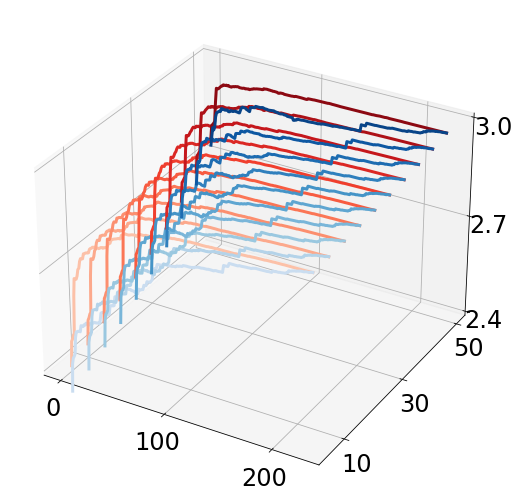

In [23]:
fig = plt.figure(figsize=(9,9))
ax0 = fig.add_subplot(projection='3d')
for c,l in enumerate(range(-1,-11,-1)):
    ax0.plot(range(227), [5*(c+1) for i in range(227)], nsupervised[:,l,1,0], color=cmaps((c+3)/13), lw=3)
    ax0.plot(range(227), [5*(c+1) for i in range(227)], nurf2[:,l,1,0], color=blues((c+3)/13), lw=3)
ax0.tick_params(labelsize=24)
ax0.set_xticks([0,100,200])
ax0.set_yticks([10,30,50])
ax0.set_zticks([2.4,2.7,3])
ax0.set_zlim(2.4,3)
plt.savefig('plots/vamp2_nfeatures.pdf')
plt.show()